# Problem 4

## a

* The quadratic penalty function is:
$$ \Phi(x_1,x_2)=x_1+x_2+\frac{1}{2\tau} (x_1^2+x_2^2-2)^2$$


* BFGS method is used for unconstrained minimization of the function $\Phi(x_1,x_2)$.

In [4]:
import scipy as sp
import numpy as np
from scipy.optimize import minimize 


In [5]:
def obj(x):
    return x[0]+x[1]

def c1(x):
    return x[0]**2+x[1]**2-2

def fun(x,mu):
    return obj(x)+(0.5/mu)*(c1(x))**2

def fun_grad(x,mu):
    der = np.zeros_like(x)
    der[0]=1+(2/mu)*(x[0]**2+x[1]**2-2)*x[0]
    der[1]=1+(2/mu)*(x[0]**2+x[1]**2-2)*x[1]
    return der


    
    
    

## b

In [147]:
## Unconstrained Minimization via...
x0 = np.array([-10,-10])
mu_list=[1,10,100,1000]
x1=list()
x2=list()
print("mu","x1".rjust(10),"x2".rjust(9),"itr".rjust(10),"constraint value".rjust(20),"fn_val".rjust(25))
for mu in mu_list:
    res = minimize(fun, x0,args=1/mu, method='BFGS', jac=fun_grad, options={'disp': False})
    print(repr(mu).ljust(4),res.x,repr(res.nit).rjust(2)
              ,repr(c1(res.x)).rjust(25),repr(obj(res.x)).rjust(25))
    x0=res.x
    x1.append(res.x[0])
    x2.append(res.x[1])
    

mu         x1        x2        itr     constraint value                    fn_val
1    [-1.10715996 -1.10715996] 14        0.4516063553539653         -2.21431992058689
10   [-1.01227311 -1.01227311]  4       0.04939371742590071       -2.0245462293688927
100  [-1.00124766 -1.00124766]  4       0.00499376944518648        -2.002495328057065
1000 [-1.00012498 -1.00012498]  3       0.00049993778776658       -2.0002499532747233


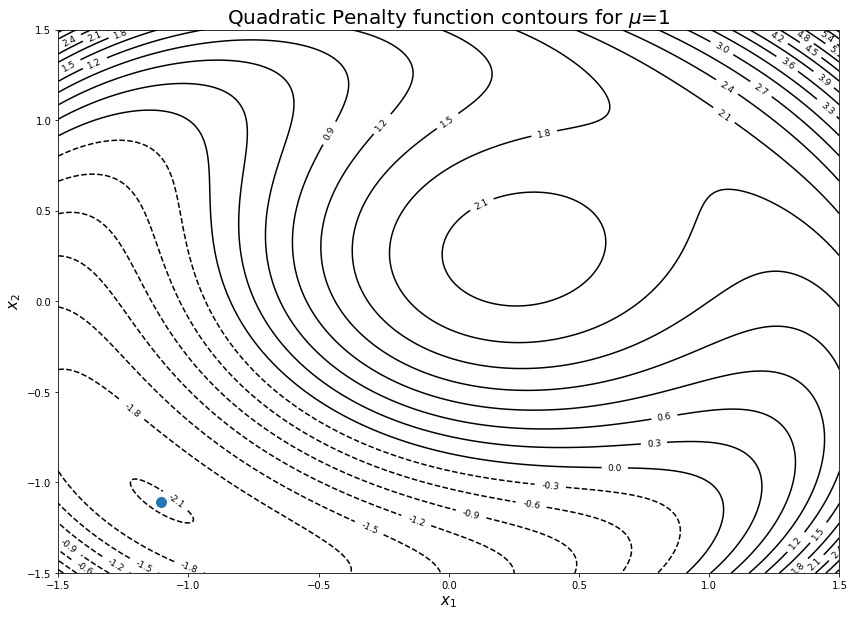

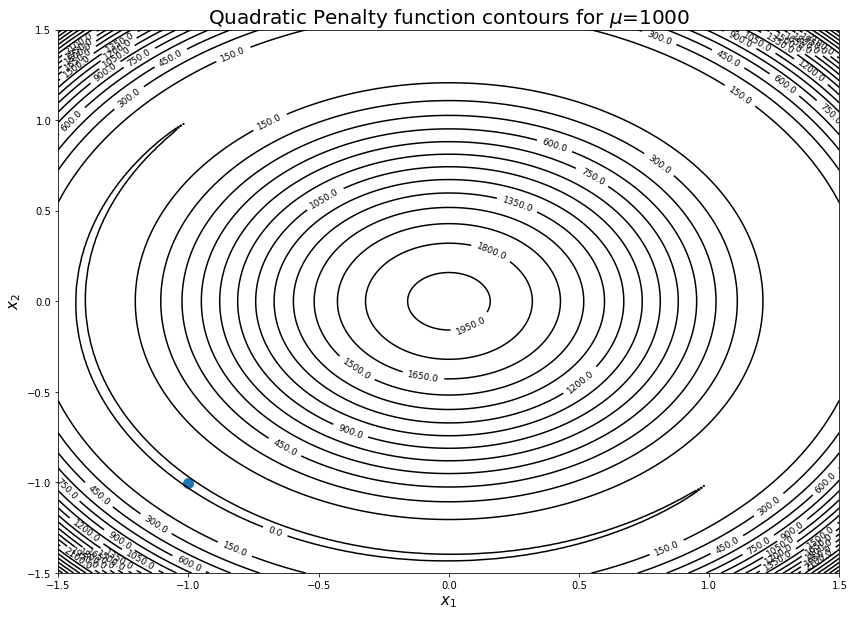

In [123]:
# Plot

from matplotlib import pyplot as plt


xlist = np.linspace(-1.5, 1.5, 300)
ylist = np.linspace(-1.5, 1.5, 300)
[X, Y] = np.meshgrid(xlist, ylist)

for fig_id in range(len(mu_list)):
    Z=fun([X,Y],1/mu_list[fig_id])
    plt.figure(figsize=(14,10))
    cp=plt.contour(X,Y,Z,30,colors='k')
    plt.clabel(cp,colors = 'k', fmt = '%2.1f', fontsize=9)
    #cp1 = plt.contourf(X, Y, Z,30)
    #plt.colorbar(cp1)
    plt.scatter(x1[fig_id],x2[fig_id],s=100)
    plt.xlabel(r"$x_1$",fontsize=15)
    plt.ylabel(r"$x_2$",fontsize=15)
    plt.title("Quadratic Penalty function contours for "+r"$\mu$="+str(mu_list[fig_id]),fontsize=20)









## c

### Content of AMPL Model File

* var X1;
* var X2;
* minimize V: X1+X2;
* subject to T: X1^2+X2^2-2=0;

### Contents of AMPL Command File

* solve;
* display _varname, _var.lb, _var, _var.ub;

### Solution from NEOS Server using MINOS